# 2019.09.09. 아이디어 도출
## 단순 아이디어 도출을 해보려고 했으나 머릿속에서 꺼내는 게 쉽지가 않아서 특정 카테고리들을 보면 쉽게 떠오를 거라 생각해서 네이버 뉴스 카테고리를 보고 아이디어 도출

### 1. 유기견 언제 많이 버려지고...

<del>2. 봉사활동(결과도출이 단순할 거 같아서 삭제)</del>

<del>3. 책 년도별 유행했던 타이틀 단어(자연어 처리라 시간 오래 걸림)</del>

<del>4. 자동차(도메인 지식이 없어서 삭제)</del>

## 유기견 프로젝트 주제 선정 기준

### 1. 팀원들이 흥미를 가지고 진행할 수 있는 주제인가?
    
    반려견은 대부분 사람에게 우호적인 성향을 보이고, 사람은 본인을 좋아하는 대상을 싫어하지 않음.
    게다가 친근한 주제로 누구나 쉽게 접근 가능하다고 판단.

### 2. 해당 주제를 기간 내에 끝낼 수 있는가?
    
    최악의 상황에 조원 중 단 한 명만 진행하게 되더라도 주제 선회로 마무리 가능


### 3.  해당 데이터를 09.11.(추석 하루 전)까지 구할 수 있는가?
    
    가능(당일 1시간 정도 시간을 가지고 데이터 수집이 가능한 주제인지 판단하였음.)

### 1. 데이터 크롤링

In [ ]:
오픈 api가 있지만 문제가 많다고 한다.
유기견 관련 데이터를 모으자
http://animal.go.kr/
여기에 모든 데이터가 다 있지만 일단 크롤링이 힘듦(1 페이지당 10초)

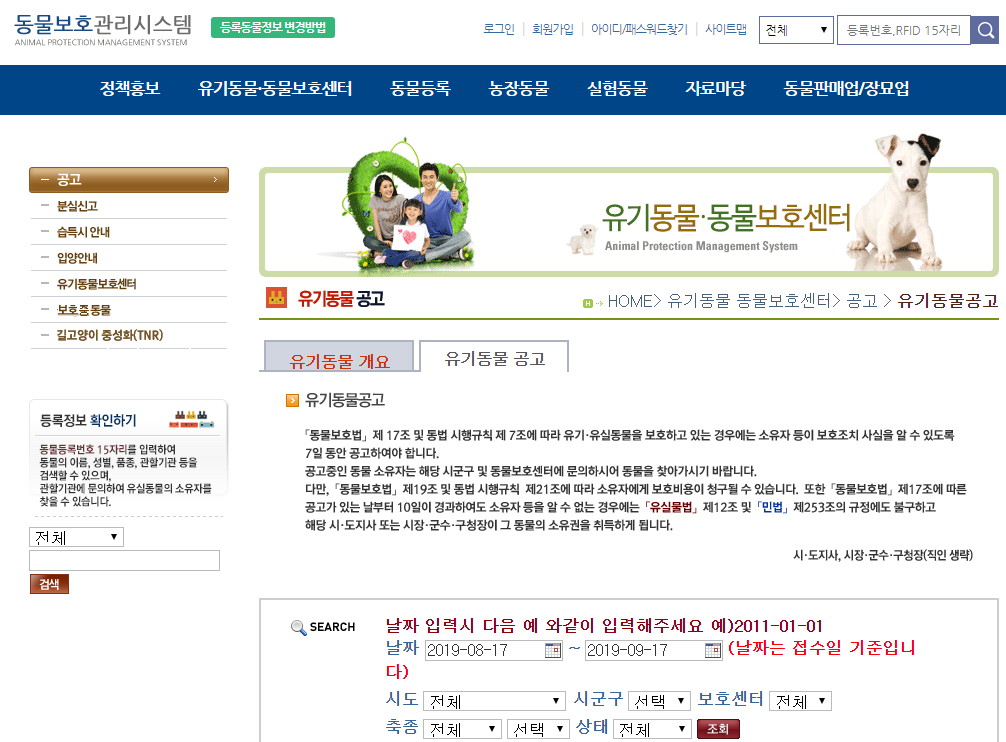

In [11]:
import requests
from bs4 import BeautifulSoup
from urllib.request import urlopen
import time
from multiprocessing import Pool

In [22]:
url = 'http://animal.go.kr/portal_rnl/abandonment/public_list.jsp?s_date=2017-09-08&e_date=2019-09-09&s_upr_cd=&s_org_cd=0000000&s_up_kind_cd=417000&s_kind_cd=&s_name=&s_shelter_cd=&s_wrk_cd=&s_state=&s_state_hidden=&pagecnt={page}'

품종 = []
성별 = []
중성화여부 = []
나이 = []
체중 = []
접수일시 = []
관할기관 = []

def get_links():
    data = []
    for page in range(1, 2):
    # x페이지 url 전송
        html = urlopen(url.format(page = page))
        soup = BeautifulSoup(html, 'lxml')    
        print("{0}페이지 탐색 중입니다.".format(page))
        
        # 페이지당 10개 있는 p tag에서 상세정보
        for j in soup.select('p.thumbnail_btn01_2 a'):
            # 주소값에 http 추가
            data.append('http://animal.go.kr' + j['href'])
    return data



def get_content(link):
    global 품종, 성별, 중성화여부, 나이, 체중, 접수일시, 관할기관
    req = urlopen(link)
    soup = BeautifulSoup(req, 'lxml')
    unit = [i.text for i in soup.select('td')]
    

    품종.append(unit[2][unit[2].find(']') + 1:].replace('\t', '').replace('\n', '').replace('\xa0', ''))
    성별.append(unit[4].replace('\xa0', ''))
    중성화여부.append(unit[5].replace('\xa0', ''))
    나이.append(int(unit[6][:unit[6].find('(')].replace('\xa0', '')))
    체중.append(float(unit[6][unit[6].rfind('/') + 1:unit[6].rfind('(')].replace('\xa0', '')))
    접수일시.append(int(unit[7].replace('\xa0', '').replace('-', '')))
    관할기관.append(unit[12].replace('\xa0', ''))
    
get_links()
for i in data:
    get_content(link)

# if __name__ == '__main__':
#     start_time = time.time()
#     pool = Pool(processes = 8)
#     pool.map(get_content, get_links())
#     print("--- %s seconds ---" % (time.time() - start_time))


1페이지 탐색 중입니다.


NameError: name 'data' is not defined

In [16]:
q = 'http://animal.go.kr/portal_rnl/abandonment/public_view.jsp?desertion_no=447509201900210&s_date=2017-09-08&e_date=2019-09-09&s_upr_cd=&s_org_cd=0000000&s_up_kind_cd=417000&s_kind_cd=&pagecnt=1&s_title=&s_sex_cd=&s_call_name=&s_shelter_cd=&s_state=&s_state_hidden='
# def get_content(link):
#     global 품종, 성별, 중성화여부, 나이, 체중, 접수일시, 관할기관
req = urlopen(q)
soup = BeautifulSoup(req, 'lxml')
print(soup)
unit = [i.text for i in soup.select('td')]
print(unit)

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html lang="ko" xml:lang="ko" xmlns="http://www.w3.org/1999/xhtml">
<head>
<title>동물보호관리시스템 &gt; 유기동물동물보호센터 &gt; 공고  &gt; 유기동물 공고</title>
<!-- HTTP 1.1 -->
<meta content="no-store" http-equiv="Cache-Control"/>
<!-- HTTP 1.0 -->
<meta content="no-cache" http-equiv="Pragma"/>
<!-- Prevents caching at the Proxy Server -->
<meta content="-1" http-equiv="Expires"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=EmulateIE9" http-equiv="X-UA-Compatible"/>
<script src="/portal_rnl/common/js/template_on.js" type="text/javascript"></script>
<script src="/portal_rnl/common/js/portal_rnl.js" type="text/javascript"></script>
<script src="/caf/js/common.js" type="text/javascript"></script>
<script src="/caf/js/prototype.js" type="text/javascript"></script>
<script src="/caf/js/formvalidator.js" type="text/javascript"></script>
<script type=

In [20]:
품종 = []
성별 = []
중성화여부 = []
나이 = []
체중 = []
접수일시 = []
관할기관 = []
def get_content(link):
    global 품종, 성별, 중성화여부, 나이, 체중, 접수일시, 관할기관
    req = urlopen(link)
    soup = BeautifulSoup(req, 'lxml')
    return [i.text for i in soup.select('td')]
#     unit = [i.text for i in soup.select('td')]
#     품종.append(unit[2][unit[2].find(']') + 1:].replace('\t', '').replace('\n', '').replace('\xa0', ''))
#     성별.append(unit[4].replace('\xa0', ''))
#     중성화여부.append(unit[5].replace('\xa0', ''))
#     나이.append(int(unit[6][:unit[6].find('(')].replace('\xa0', '')))
#     체중.append(float(unit[6][unit[6].rfind('/') + 1:unit[6].rfind('(')].replace('\xa0', '')))
#     접수일시.append(int(unit[7].replace('\xa0', '').replace('-', '')))
#     관할기관.append(unit[12].replace('\xa0', ''))
    
get_content('http://animal.go.kr/portal_rnl/abandonment/public_view.jsp?desertion_no=426334201900723&s_date=2017-09-07&e_date=2019-09-08&s_upr_cd=&s_org_cd=0000000&s_up_kind_cd=417000&s_kind_cd=&pagecnt=5&s_title=&s_sex_cd=&s_call_name=&s_shelter_cd=&s_state=&s_state_hidden=')

['\n                                    「동물보호법」 제17조, 같은 법 시행령 제7조 및 같은 법 시행규칙 제20조에 따라 구조된 동물의 보호상황을 아래와 같이 공고합니다.\n                                ',
 '부산-사하-2019-00654\xa0',
 '\n\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t[개]푸들\n\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\xa0\t\t\n\t\t\t\t\t\t\t\t',
 '갈색\xa0',
 '수컷\xa0',
 '미상\xa0',
 '2013(년생)\xa0/\xa05(Kg)',
 '2019-09-08\xa0',
 '사하로141번나길35-4\xa0',
 '갈색 & 그린칼라 목줄착용\xa0',
 '2019-09-09 ~ 2019-09-19\xa0',
 ' ** 유기동물 문의는 보호센터에 연락하시기 바랍니다.\xa0',
 '유기동물및동물보호협\xa0',
 '051-971-6208\xa0',
 '\n부산광역시 강서구 가락대로1283번길 25-2 (봉림동)\n\t\t\t\t\t\t\t\t\t\xa0\xa0\n',
 '\n\t\t\t\t\t\t\t\t\t부산광역시\n\t\t\t\t\t\t\t\t \t사하구\t\xa0\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t',
 '장성현\xa0',
 '051-220-4476\xa0',
 '\xa0',
 '\n\xa0\xa0\n\t\t\t\t\t\t\t\t 상기 동물을 분실하신 소유주께서는 보호센터로 문의하시어 동물을 찾아가시기 바라며,  동물보호 법 제17조\n\t\t\t\t\t\t\t\t 의 규정에 따른 공고가 있는 날부터 10일이 경과하여도 소유자 등을 알 수 없는 경우에는 유실물법  제12조\n\t\t\t\t\t\t\t\t 및 민법 제253조의 규정에 불구하

In [18]:
print(품종, 성별, 중성화여부, 나이, 체중, 접수일시, 관할기관)

['푸들'] ['수컷'] ['미상'] [2013] [5.0] [20190908] ['유기동물및동물보호협']


## 일단 돌려놓으면 그래도 긁을 수는 있겠지? 하고 집 pc로 돌려놓았으나...

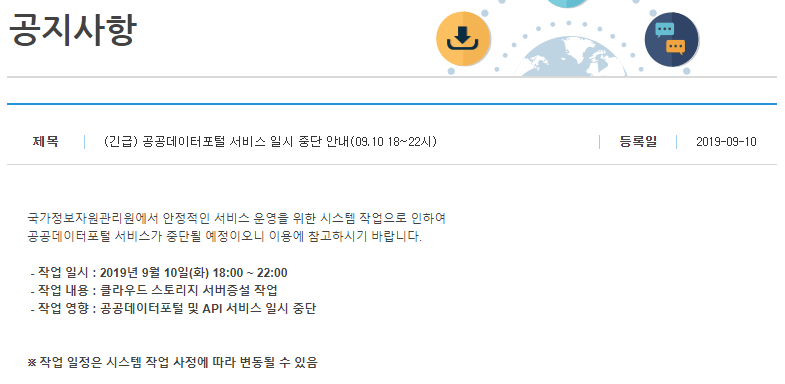

# ??????????????????????????????

# 2019.09.10. 방황
## 홈페이지에서 긁어오려면 51시간...
1. 프로젝트 주제 재검토

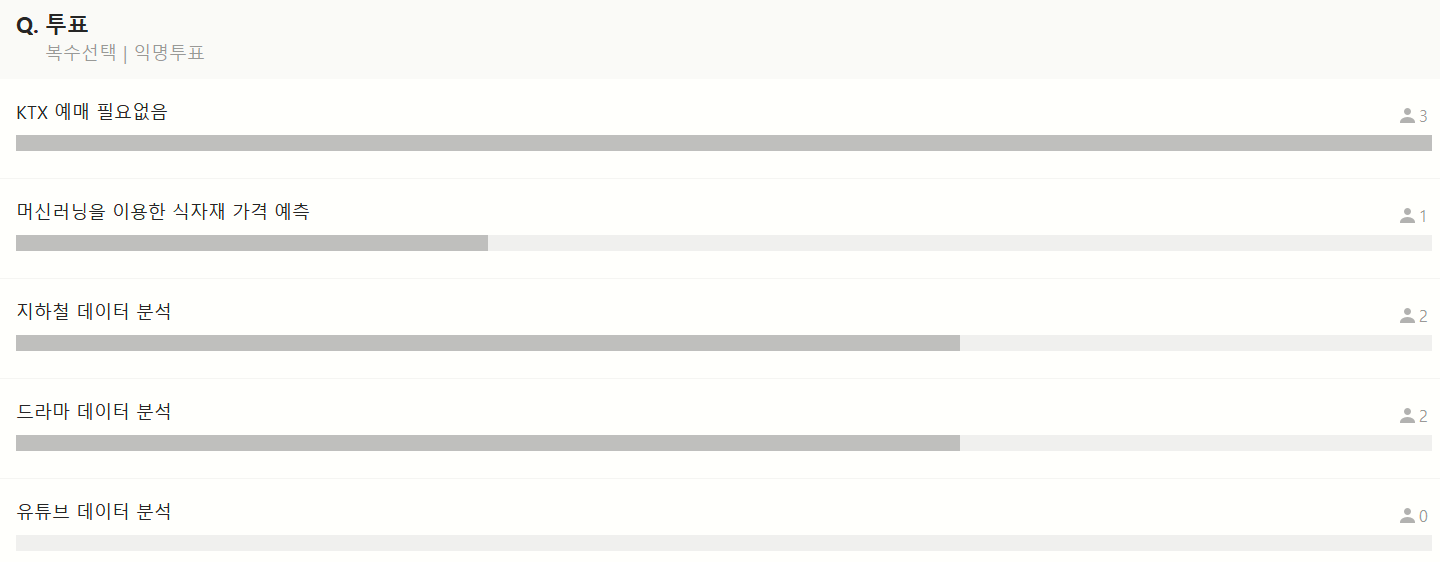

# 2019.09.11. 데이터 수집
## 문제가 많은 오픈 API 서버
1. 오픈 API

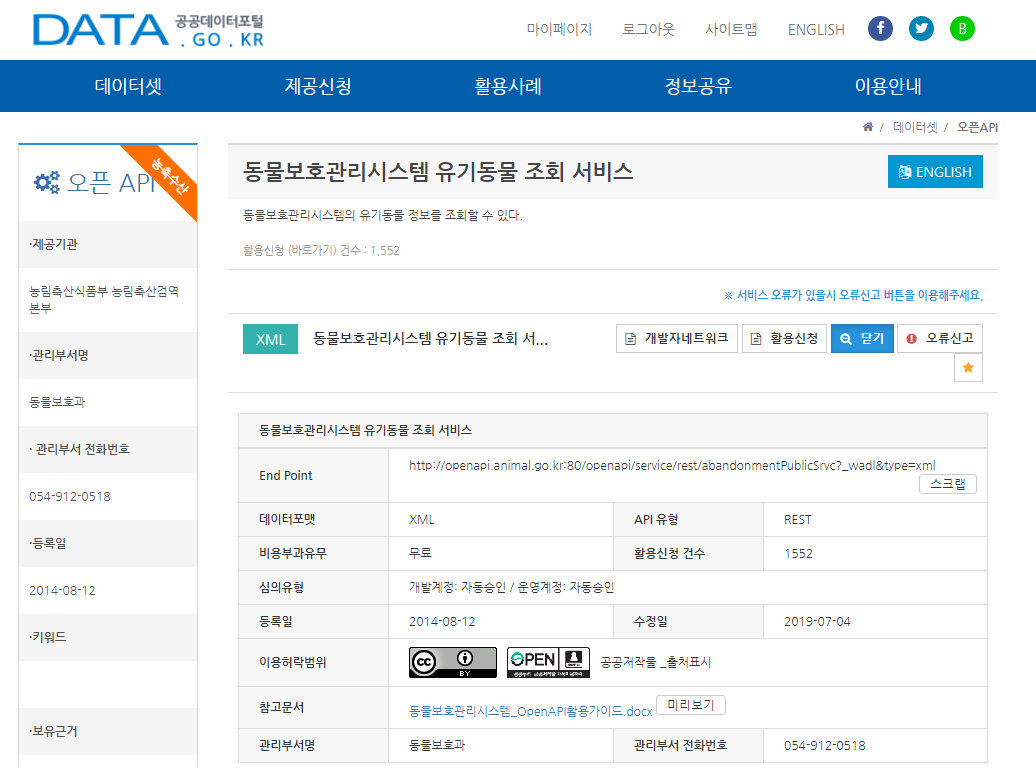

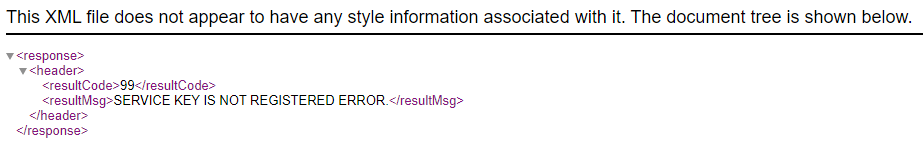

1-1. data.go.kr의 오픈 api는 '회원가입 -> 데이터 활용신청 -> 승인 후 데이터 이용' 순으로 진행이 됨.

1-2. 위와 같은 에러로 진행이 안 돼서 동물보호관리시스템에 문의.

1-3. 담당자 휴가, 현재 문제 원인 파악 불가

1-4. data.go.kr 오픈 api 부서에 연락

1-5. 인증 key 발급 후 1시간 뒤에 정상 이용 가능하다고 함.

1-6. 안 돼서 다시 전화. (오전 10시)

1-7. 본인들도 모르겠음, 오전 중에 전화주겠음.

1-8. 전화 안 줌

1-9. 12시 30분경에 전화하였으나 점심시간

1-10. 1시에 연락하니까 받음

1-11. 이유는 모르겠고, 해결 불가능. 

1-12. 데이터를 xlsx로 달라고 요청.

1-13. '원칙적'으로 불가능하다고 답변 받음.

1-14. '원칙적'인 상황이 아니라 권한을 가진 상급자와 연결 요청 바란다고 하자, 비공개로 문의하면 파일로 받을 수 있을지도 모른다고 답변 받음.

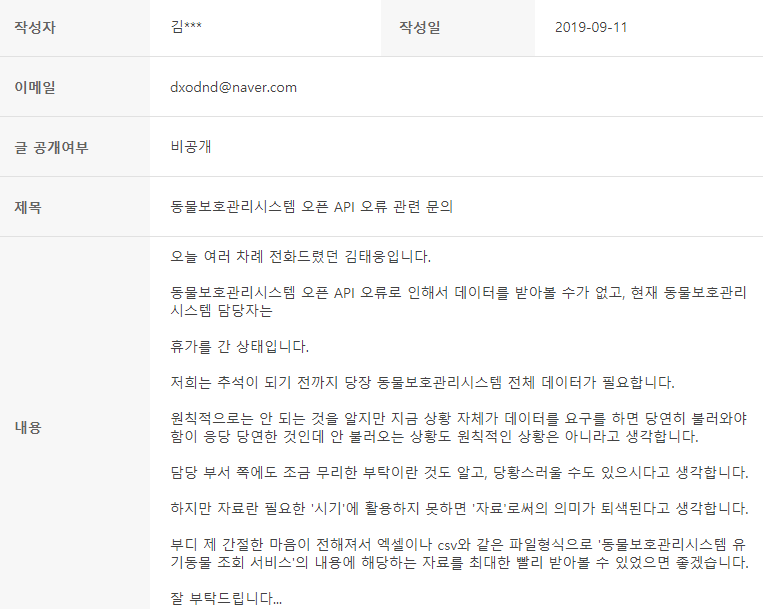

1-15. 문의 글을 올리자 기적과 같이 본 계정의 원인 불명 에러가 해결되고 오픈 api를 정상적으로 이용 가능하며, 파일로 받아볼 수 없다고 답변
<p>1-16. 오픈 api 이용법 공부

# 2019.09.12. 데이터 크롤링
## 데이터 크롤링 확률이 랜덤인 사이트가 있다?!
1. 한 페이지당 5만 개로 데이터 요청, 총 데이터 163437개

In [72]:
# 공공 데이터 포털 오픈 API 긁어와지는지만 확인
import requests
from bs4 import BeautifulSoup
import requests

ServiceKey = # 보안상 이유로 삭제
url = "http://openapi.animal.go.kr/openapi/service/rest/abandonmentPublicSrvc/abandonmentPublic?bgnde=20150912&endde=20190911&pageNo=1&numOfRows=10000&ServiceKey="
request = requests.get(url+ServiceKey).text
soup = BeautifulSoup(request, 'lxml')

In [71]:
# 키도 주소도 맞게 적었다고?
# 응 될지 안 될지는 내 맘이야
print(soup.prettify())

<?xml version="1.0" encoding="UTF-8" standalone="yes"?>
<html>
 <body>
  <response>
   <header>
    <resultcode>
     99
    </resultcode>
    <resultmsg>
     SERVICE KEY IS NOT REGISTERED ERROR.
    </resultmsg>
   </header>
  </response>
 </body>
</html>


In [1]:
## 사이트 크롤링 확률이 운이라 수작업으로 해야 함 총 데이터 163437개

In [68]:
ServiceKey1 = "ePfZVL1%2BsyifhHhQoxgfW2sCTOIL71thr0v%2FSMFgGX7BPRmC4th9rUeE1kKSN7cteFjgQOvs%2F3f3G6DHB%2FQNvw%3D%3D"
url1 = 'http://openapi.animal.go.kr/openapi/service/rest/abandonmentPublicSrvc/abandonmentPublic?serviceKey=ePfZVL1%2BsyifhHhQoxgfW2sCTOIL71thr0v%2FSMFgGX7BPRmC4th9rUeE1kKSN7cteFjgQOvs%2F3f3G6DHB%2FQNvw%3D%3D&bgnde=20140601&endde=20140630&pageNo=1'
request1 = requests.get(url1+ServiceKey1).text
soup1 = BeautifulSoup(request1, 'lxml')

In [76]:
soup1.text[0]

'0'

In [78]:
soup.select('item')[0].text

'2016(년생)경상남도 창원시 의창구 창이대로 71 (명서동, 창원시농업기술센터) 축산과창원유기동물보호소055-225-5481의창성산구갈색448567201900738http://www.animal.go.kr/files/shelter/2019/08/201909121409304_s.jpg20190911의창구 북면 동전로 여성의 집 앞 [개] 푸들N20190923경남-창원1-2019-0073620190912055-225-5484경상남도 창원시 의창성산구http://www.animal.go.kr/files/shelter/2019/08/201909121409304.jpg보호중MI-9-1-27 갈색. 목줄+리드줄 착용. 4.2(Kg)'

In [ ]:
import requests
from bs4 import BeautifulSoup
import requests


ServiceKey = # 보안 이유로 삭제
year = "http://openapi.animal.go.kr/openapi/service/rest/abandonmentPublicSrvc/abandonmentPublic?bgnde=20170101&endde=20181231&upkind=417000&pageNo={page}&numOfRows=50000&ServiceKey="
for i in range(4, 5): # 1부터 4까지 1개 1개 넣어서 5만 건 제대로 들어갔으면 그다음 실행
    request = requests.get(year.format(page = i) + ServiceKey).text
    soup = BeautifulSoup(request, 'lxml')    

# append하면 나중에 이렇게됨 종 = [[50000개], [50000개]]
    # 종
    종 += [i.text[i.text.find(']') + 2:] for i in soup.select('item kindcd')]
    # 나이 나옴
    나이 += [ i.text[:i.text.find('(')] for i in soup.select('item age')]
    # 성별
    성별 += [i.text for i in soup.select('item sexcd')]
    # 무게
    무게 += [i.text.replace('(Kg)', '') for i in soup.select('item weight')]
    # 접수일
    접수일 += [i.text for i in soup.select('item happendt')]
    # 중성화 여부
    중성화유무 += [i.text for i in soup.select('item neuteryn')]
    # 접수장소
    접수장소+= [i.text for i in soup.select('item orgnm')]


In [180]:
import pandas as pd
sample = pd.read_excel('sample.xlsx')

In [95]:
len(sample['종'][sample['종'].values == '케니스펜더'])

2

In [181]:
len(sample['종'].unique())

562

In [182]:
len(sample['종'])

163437